[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_10-DeepLearning/blob/master/W10_CCS--TC--Deep_Learning_CC_1.ipynb)

# Deep Learning 

![Scoobie Doo Deep Learning Linear Algebra](http://www.ryanleeallred.com/wp-content/uploads/2018/06/scoobie-doo-e1528145568470.jpg)


---







## Different kinds of layers

During this module we are going to focus on the underlying structure of convolutional neural networks and how they are able to perform super-human image classification tasks. (given enough compute resources)

Convolutional Neural Networks leverage groupings of different kinds of layers to process image data. Each of these layers performs a specific function that can be understood as a linear algebra transformation of the information that is passed from the previous layer. 

CNNs consist of combinations of four main types of layers:

*   Convolutional Layers
*   Activation Layers (Relu) 
*   Max Pooling Layers
*   Fully Connected Layers

![Convolutional Neural Network Diagram](http://www.ryanleeallred.com/wp-content/uploads/2018/06/CNN-diagram.jpeg)

You are already familiar with convolutional layers from our Monday and Tuesday material where we convolved a filter or kernel matrix over an image to create a new convolutional layer/image.

You are already familiar with how Relu and Activation layers help regularlize layer outputs and speed up training.

You are also familiar with fully connected layers. These are where every neuron in one layer is connected with every neuron in the subsequent layer. (Just like in the networks that we built from last week.) These are typically only used in the last couple of layers of a CNN -for reason's that we'll go over during lecture. The point is that you already have a general understanding of them.

That leaves Max Pooling layers. In this code challenge you're going to learn a little bit about pooling layers and implement a MaxPooling function from scratch on a 2d grayscale image.

Watch this video which gives a good explanation of how pooling works:

[Max Pooling Video](https://www.youtube.com/watch?v=ZjM_XQa5s6s&t=371s)


In [1]:
!pip install imageio

Color image dimensions:  (192, 192, 3)
Grayscale image dimensions:  (192, 192)


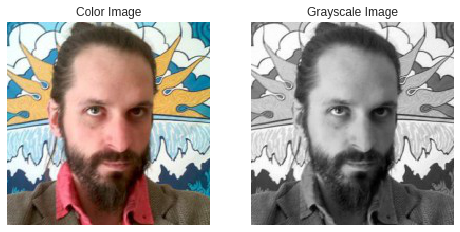

In [2]:
# Import Libraries
import imageio
import matplotlib.pyplot as plt
import numpy as np
from skimage.exposure import rescale_intensity
from skimage import color

# Read in RGB image 
img = imageio.imread('https://raw.githubusercontent.com/ryanleeallred/DeepLambda/master/Thomson3D.jpeg')

# Change image to grayscale
grayscale = rescale_intensity(color.rgb2gray(img))

# grayscale = 1-color.rgb2gray(img)

# Plot both images for our viewing pleasure
plt.subplot(121) 
plt.imshow(img, cmap = 'gray')
plt.title('Color Image'),
plt.xticks([]) 
plt.yticks([])

plt.subplot(122)
plt.imshow(grayscale, cmap = 'gray')
plt.title('Grayscale Image')
plt.xticks([])
plt.yticks([])

print('Color image dimensions: ', img.shape)
print('Grayscale image dimensions: ', grayscale.shape)

# Max Pooling
Write your own MaxPooling Function and apply it to the above grayscale image. Use Matplotlib to display the results. 

Make your filter size 2x2 and give it a stride of 2.

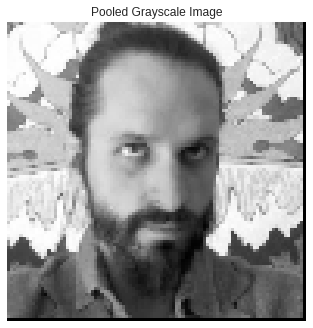

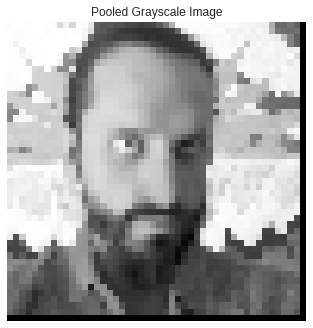

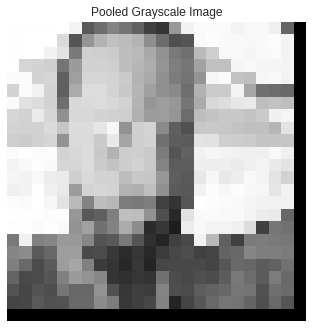

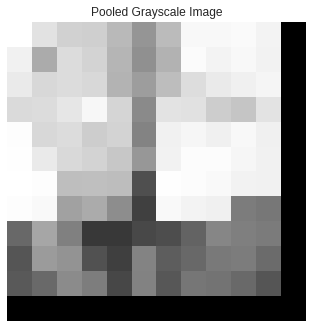

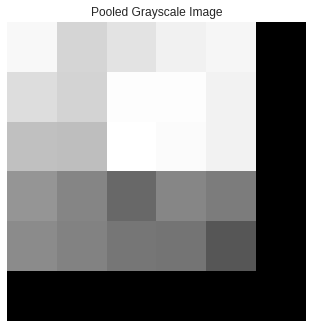

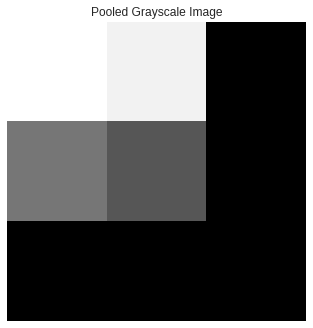

In [21]:
# #### Your Code Here #####
def MaxPooling(I, s, z):
    P = np.zeros([int(I.shape[0]/s),int(I.shape[1]/s)])
    i = 0
    while i < I.shape[0]:
        j = 0
        while j < I.shape[1]:
            t_i = min(I.shape[0],i+z)
            t_j = min(I.shape[1],j+z)
            P_val = max(I[i:t_i,j:t_j].ravel())
            P[int((i-1)/s),int((j-1)/s)] = P_val
            j = j + s
        i = i + s
    return P

pooled_grayscale = MaxPooling(grayscale, 2, 2)
plt.imshow(pooled_grayscale, cmap = 'gray')
plt.title('Pooled Grayscale Image')
plt.xticks([])
plt.yticks([])
plt.show()
while(pooled_grayscale.shape[0] > 5):
    pooled_grayscale = MaxPooling(pooled_grayscale, 2, 2)
    plt.imshow(pooled_grayscale, cmap = 'gray')
    plt.title('Pooled Grayscale Image')
    plt.xticks([])
    plt.yticks([])
    plt.show()


## Stretch Goal:

Modify your Max Pooling function so that it can work on any square grayscale image with any filter size and any sized stride. 

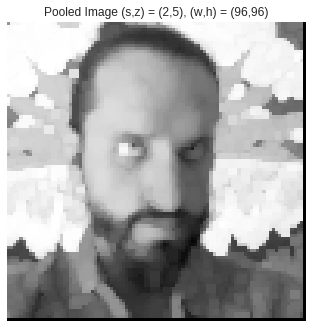

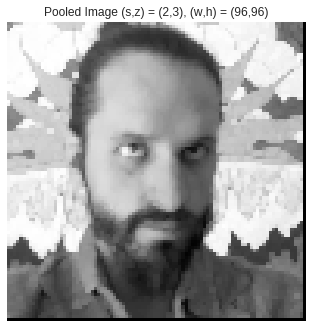

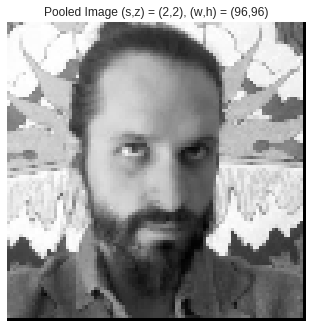

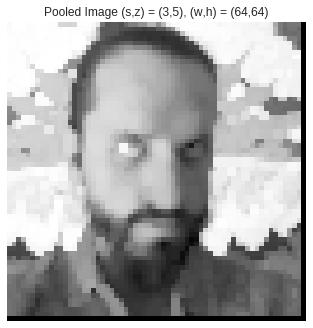

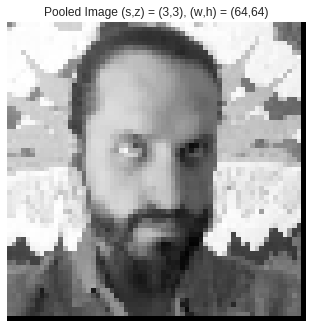

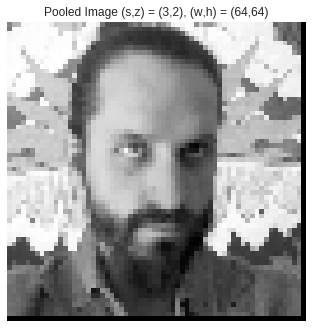

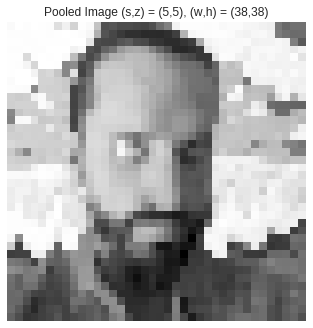

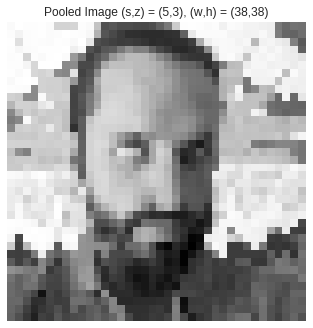

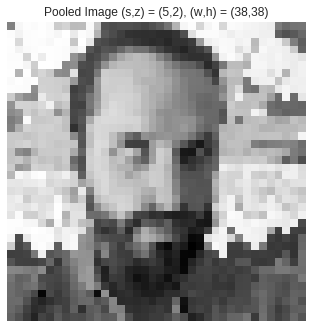

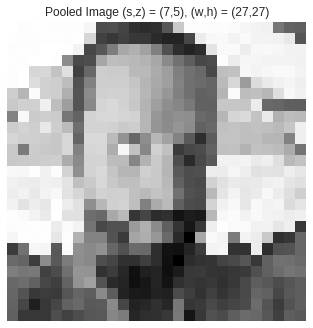

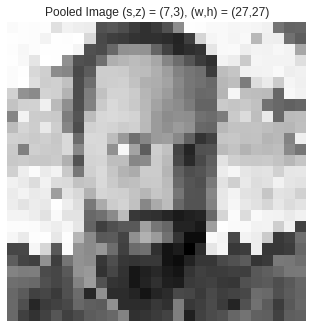

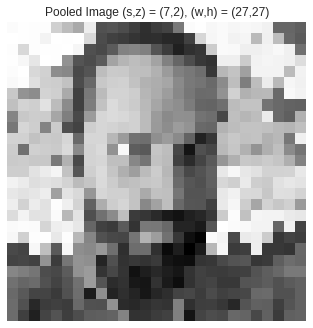

In [22]:
for s in [2,3,5,7]:
    for z in [5,3,2]:
        pooled_grayscale = MaxPooling(grayscale, s, z)
        plt.imshow(pooled_grayscale, cmap = 'gray')
        title = 'Pooled Image (s,z) = (%d,%d), (w,h) = (%d,%d)' % (s,z,pooled_grayscale.shape[0],pooled_grayscale.shape[1])
        plt.title(title)
        plt.xticks([])
        plt.yticks([])
        plt.show()